# Librerias

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from models.kmeans_optimization import KMeansClustering as KMeansOriginal
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score, mutual_info_score


# Cargando data

In [58]:
csv_path = './procesed-data/reduced/pca/r21d-cleaned.csv'
data_r21d = pd.read_csv(csv_path, header=None)
data_r21d = data_r21d.to_numpy()

csv_path = './procesed-data-validation/reduced/pca/r21d-cleaned.csv'
data_r21d_validation = pd.read_csv(csv_path, header=None)
data_r21d_validation = data_r21d_validation.to_numpy()

csv_path = './procesed-data/reduced/pca/s3d-cleaned.csv'
data_s3d = pd.read_csv(csv_path, header=None)
data_s3d = data_s3d.to_numpy()

csv_path = './procesed-data-validation/reduced/pca/s3d-cleaned.csv'
data_s3d_validation = pd.read_csv(csv_path, header=None)
data_s3d_validation = data_s3d_validation.to_numpy()

csv_path = './data/val_subset_10.csv'
val_subset_10 = pd.read_csv(csv_path, header=0)

# Kmeans & r21d

In [59]:
csv_path = './procesed-data-validation/full/r21d.csv'
labels = pd.read_csv(csv_path, header=0)
labels = labels['Filename']
labels = labels.str.split('_').str[0]

In [60]:
filtered_df = pd.DataFrame(columns=val_subset_10.columns)

for label in labels:
    row = val_subset_10[val_subset_10['youtube_id'] == label]
    filtered_df = pd.concat([filtered_df, row], ignore_index=True)

In [61]:
encoder = LabelEncoder()
filtered_df['label_encoded'] = encoder.fit_transform(filtered_df['label'])
real_labels = filtered_df['label_encoded']
real_labels_array = real_labels.to_numpy()

In [62]:
k=10
kmeans_original = KMeansOriginal(n_clusters=k, random_state=42)
kmeans_original.fit(data_r21d, max_iterations=500000)
predict_r21d = kmeans_original.predict(data_r21d_validation)
score = adjusted_rand_score(real_labels_array, predict_r21d)
print("Adjusted Rand Score:", score)

Adjusted Rand Score: 0.6630231026546514


In [63]:

score_ars = adjusted_rand_score(real_labels_array, predict_r21d)

score_silhouette = silhouette_score(data_r21d_validation, predict_r21d)

score_mi = mutual_info_score(real_labels_array, predict_r21d)

# Creando un DataFrame de pandas para mostrar los resultados
results = pd.DataFrame({
    'Metric': ['Adjusted Rand Score', 'Silhouette Score', 'Mutual Information'],
    'Score': [score_ars, score_silhouette, score_mi]
})

print(results.to_string(index=False))


             Metric    Score
Adjusted Rand Score 0.663023
   Silhouette Score 0.082161
 Mutual Information 1.678428


Adjusted Rand Score con max_iter=1: 0.3690265988073392
Adjusted Rand Score con max_iter=2: 0.5283521441558734


Adjusted Rand Score con max_iter=3: 0.6035637054621155
Adjusted Rand Score con max_iter=4: 0.6610827869319539
Adjusted Rand Score con max_iter=5: 0.6630231026546514
Adjusted Rand Score con max_iter=6: 0.6630231026546514
Adjusted Rand Score con max_iter=7: 0.6630231026546514
Adjusted Rand Score con max_iter=8: 0.6630231026546514
Adjusted Rand Score con max_iter=9: 0.6630231026546514
Adjusted Rand Score con max_iter=10: 0.6630231026546514
Adjusted Rand Score con max_iter=11: 0.6630231026546514
Adjusted Rand Score con max_iter=12: 0.6630231026546514
Adjusted Rand Score con max_iter=13: 0.6630231026546514
Adjusted Rand Score con max_iter=14: 0.6630231026546514
Adjusted Rand Score con max_iter=15: 0.6630231026546514
Adjusted Rand Score con max_iter=16: 0.6630231026546514
Adjusted Rand Score con max_iter=17: 0.6630231026546514
Adjusted Rand Score con max_iter=18: 0.6630231026546514
Adjusted Rand Score con max_iter=19: 0.6630231026546514
Adjusted Rand Score con max_iter=20: 0.6630231026546514

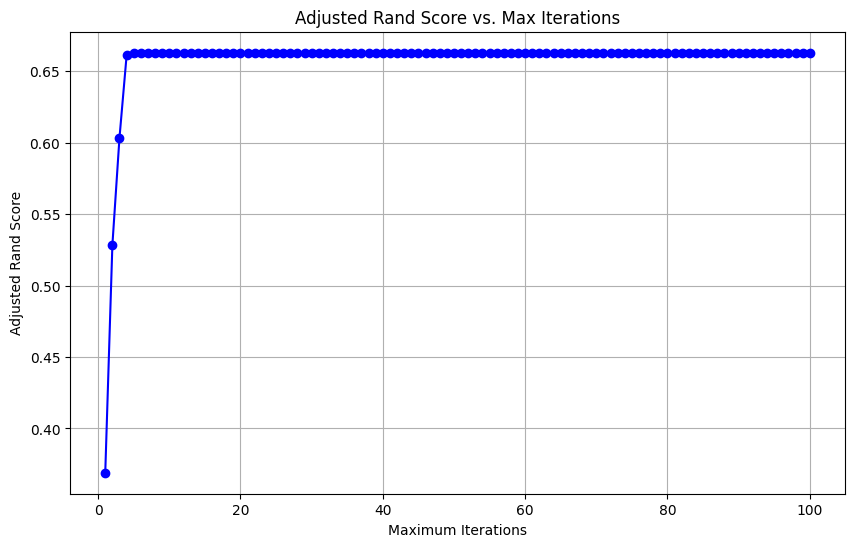

In [64]:
k = 10
iteration_steps = []
scores = []

for max_iter in range(1, 101, 1):
    kmeans_original = KMeansOriginal(n_clusters=k, random_state=42)
    kmeans_original.fit(data_r21d, max_iterations=max_iter)  
    predict_r21d = kmeans_original.predict(data_r21d_validation)  
    score = adjusted_rand_score(real_labels_array, predict_r21d) 
    scores.append(score) 
    iteration_steps.append(max_iter)
    print(f"Adjusted Rand Score con max_iter={max_iter}: {score}")

results_df = pd.DataFrame({
    'Max Iterations': iteration_steps,
    'ARS-PCA-R21D': scores
})

results_df.to_csv('./experiments-results/ARS-PCA-R21D.csv', index=False)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(iteration_steps, scores, marker='o', linestyle='-', color='b')
plt.title('Adjusted Rand Score vs. Max Iterations')
plt.xlabel('Maximum Iterations')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.show()

# Kmeans & s3d

In [65]:
csv_path = './procesed-data-validation/full/s3d.csv'
labels = pd.read_csv(csv_path, header=0)
labels = labels['Filename']
labels = labels.str.split('_').str[0]

In [66]:
filtered_df = pd.DataFrame(columns=val_subset_10.columns)

for label in labels:
    row = val_subset_10[val_subset_10['youtube_id'] == label]
    filtered_df = pd.concat([filtered_df, row], ignore_index=True)

In [67]:
encoder = LabelEncoder()
filtered_df['label_encoded'] = encoder.fit_transform(filtered_df['label'])
real_labels = filtered_df['label_encoded']
real_labels_array = real_labels.to_numpy()

In [68]:
k=10
kmeans_original = KMeansOriginal(n_clusters=k, random_state=42)
kmeans_original.fit(data_s3d, max_iterations=200)
predict_s3d = kmeans_original.predict(data_s3d_validation)
score = adjusted_rand_score(real_labels_array, predict_s3d)
print("Adjusted Rand Score:", score)

Adjusted Rand Score: 0.01543821785398657


In [69]:
score_ars = adjusted_rand_score(real_labels_array, predict_s3d)

score_silhouette = silhouette_score(data_s3d_validation, predict_s3d)

score_mi = mutual_info_score(real_labels_array, predict_s3d)

results = pd.DataFrame({
    'Metric': ['Adjusted Rand Score', 'Silhouette Score', 'Mutual Information'],
    'Score': [score_ars, score_silhouette, score_mi]
})

print(results.to_string(index=False))

             Metric    Score
Adjusted Rand Score 0.015438
   Silhouette Score 0.233335
 Mutual Information 0.227018


Adjusted Rand Score con max_iter=1: 0.01095474247825441
Adjusted Rand Score con max_iter=2: 0.013989058798387733
Adjusted Rand Score con max_iter=3: 0.014182964629842353
Adjusted Rand Score con max_iter=4: 0.01468862434228583
Adjusted Rand Score con max_iter=5: 0.01535438098897463
Adjusted Rand Score con max_iter=6: 0.01535438098897463
Adjusted Rand Score con max_iter=7: 0.01543821785398657
Adjusted Rand Score con max_iter=8: 0.01543821785398657
Adjusted Rand Score con max_iter=9: 0.01543821785398657
Adjusted Rand Score con max_iter=10: 0.01543821785398657
Adjusted Rand Score con max_iter=11: 0.01543821785398657
Adjusted Rand Score con max_iter=12: 0.01543821785398657
Adjusted Rand Score con max_iter=13: 0.01543821785398657
Adjusted Rand Score con max_iter=14: 0.01543821785398657
Adjusted Rand Score con max_iter=15: 0.01543821785398657
Adjusted Rand Score con max_iter=16: 0.01543821785398657
Adjusted Rand Score con max_iter=17: 0.01543821785398657
Adjusted Rand Score con max_iter=18: 0

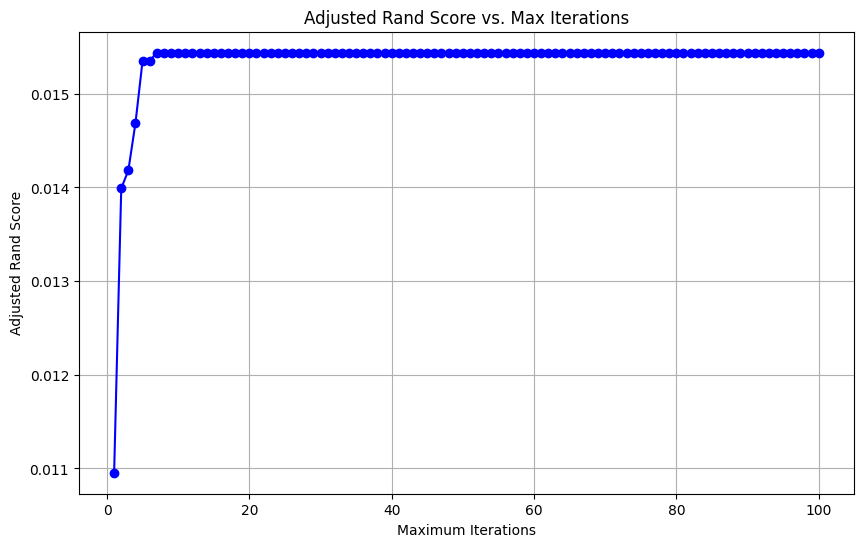

In [70]:
k = 10
iteration_steps = []
scores = []

for max_iter in range(1, 101, 1):
    kmeans_original = KMeansOriginal(n_clusters=k, random_state=42)
    kmeans_original.fit(data_s3d, max_iterations=max_iter)  
    predict_s3d = kmeans_original.predict(data_s3d_validation)  
    score = adjusted_rand_score(real_labels_array, predict_s3d) 
    scores.append(score) 
    iteration_steps.append(max_iter)
    print(f"Adjusted Rand Score con max_iter={max_iter}: {score}")

results_df = pd.DataFrame({
    'Max Iterations': iteration_steps,
    'ARS-PCA-S3D': scores
})

results_df.to_csv('./experiments-results/ARS-PCA-S3D.csv', index=False)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(iteration_steps, scores, marker='o', linestyle='-', color='b')
plt.title('Adjusted Rand Score vs. Max Iterations')
plt.xlabel('Maximum Iterations')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.show()
